## Credit Card Fraud Detection
---
### 1. 데이터셋 읽기 및 관찰

In [6]:
import pandas as pd

In [7]:
path = '../../data/practice/creditcard.csv'
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### 🦹사기에 해당하는 데이터 비율 파악

In [9]:
# fraud데이터가 매우 적게 분포하고 있음

df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
print(f'Rate of Fraud:{str(round((df.Class.sum()/len(df.Class)) * 100,2))}%')

Rate of Fraud:0.17%


Text(0.5, 1.0, 'Class Distribution \n (0: No Fraud || 1: Fraud)')

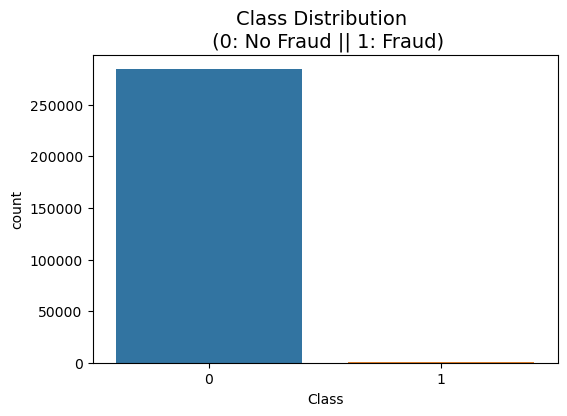

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'Class')
plt.title('Class Distribution \n (0: No Fraud || 1: Fraud)', fontsize = 14)


### 2. 데이터 분리
#### x,y data 분리

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
x = df.iloc[:, 1:-1]
y = df.iloc[:,-1]
x.shape, y.shape

((284807, 29), (284807,))

#### train/test set분리
- stratify를 잘 걸어두어서 데이터의 불균형성이 잘 반영된 것으로 보인다.

In [31]:
from sklearn.model_selection import train_test_split
x_tr, x_t, y_tr, y_t = train_test_split(x, y, stratify=y,test_size=0.3, random_state=0xC0FFEE)

x_tr.shape, x_t.shape, y_tr.shape, y_t.shape

((199364, 29), (85443, 29), (199364,), (85443,))

In [43]:
# 나눈 데이터의 불균형 정도 파악
import numpy as np

np.unique(y_tr, return_counts = True)[1]

array([199020,    344], dtype=int64)

In [47]:
tmp = np.unique(y_tr, return_counts = True)[1]
print(f'Rate of Fraud: {round((tmp[1]/len(y_tr)) *100,2)} %')

Rate of Fraud: 0.17 %


---
## 3. 모델 적용 및 성능평가 ver1
- 모델 적용 전 성능을 평가하는 함수 빌드
- 모델 적용

#### 분류기 성능 return 함수

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_t, pred):
    acc = accuracy_score(y_t,pred)
    pre = precision_score(y_t,pred)
    recall = recall_score(y_t,pred)
    f1 = f1_score(y_t,pred)
    roc = roc_auc_score(y_t, pred)

    return acc, pre, recall, f1, roc


#### 성능 출력 함수

In [50]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_t, pred):
    confusion = confusion_matrix(y_t, pred)
    acc, pre, recall, f1, roc = get_clf_eval(y_t, pred)
    
    print('=>Confusion Matrix:')
    print(confusion_matrix(y_t, pred))
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(acc, pre, recall, f1, roc))

#### Logistic Regression
- 얼핏보면 정확도acc는 높게 나왔지만 recall지수가 낮음(55개 오류)
- 즉, 실제적인 사기를 잡을 확률이 매우 낮게 나왔다는것.

In [55]:
%%time

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state= 0xC0FFEE, solver = 'liblinear')
lr_clf.fit(x_tr, y_tr)
lr_pred = lr_clf.predict(x_t)

print_clf_eval(y_t, lr_pred)

=>Confusion Matrix:
[[85281    14]
 [   55    93]]
Accuracy: 0.9992, Precision: 0.8692, Recall: 0.6284, F1: 0.7294, AUC: 0.8141
CPU times: total: 547 ms
Wall time: 3.09 s


#### DT
- recall 값이 좀 더 높아짐 (55->30개 오류)
- 시간적인 측면에서 내 경우에는 2초 더 느림

In [56]:
%%time

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state= 0xC0FFEE, max_depth=4)
dt_clf.fit(x_tr, y_tr)
dt_pred = dt_clf.predict(x_t)

print_clf_eval(y_t, dt_pred)

=>Confusion Matrix:
[[85268    27]
 [   30   118]]
Accuracy: 0.9993, Precision: 0.8138, Recall: 0.7973, F1: 0.8055, AUC: 0.8985
CPU times: total: 922 ms
Wall time: 5.16 s


#### Random Forest
- recall성능 더 좋아짐(55->30->28개 오류)
- 시간은 많이 소요되긴함

In [63]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state= 0xC0FFEE, n_jobs = -1, n_estimators=100)
rf_clf.fit(x_tr, y_tr)
rf_pred = rf_clf.predict(x_t)

print_clf_eval(y_t, rf_pred)

=>Confusion Matrix:
[[85288     7]
 [   28   120]]
Accuracy: 0.9996, Precision: 0.9449, Recall: 0.8108, F1: 0.8727, AUC: 0.9054
CPU times: total: 6min 54s
Wall time: 32.5 s


#### LGBM
- recall의 수치가 더 향상(55->30->28->21개 오류)
- 시간 매우 빠름
- ```[LightGBM] [Warning] No further splits with positive gain, best gain: -inf ``` 경고 발생하여 num_leaves 매개변수 조정
- 11,12 에서는 오류 개수가 증가하면서 recall값이 떨어지게됨.
- 데이터 불균형이 심해서 어쩔 수 없는 부분인 것 같아 기존 64 로 유지

In [90]:
%%time

from lightgbm import LGBMClassifier


lgbm_clf = LGBMClassifier(n_jobs = -1, n_estimators=1000, num_leaves= 64, boost_from_average = False,verbose = -1)
lgbm_clf.fit(x_tr, y_tr)
lgbm_pred = lgbm_clf.predict(x_t)

print_clf_eval(y_t, lgbm_pred)

=>Confusion Matrix:
[[85288     7]
 [   21   127]]
Accuracy: 0.9997, Precision: 0.9478, Recall: 0.8581, F1: 0.9007, AUC: 0.9290
CPU times: total: 40.6 s
Wall time: 3.17 s


## 3. 모델 적용 및 성능평가 ver1-1
**❗함수를 만들어 data frame으로 정리해 표로 만들어보기**

- 모델과 데이터를 주면 성능 출력하는 함수로 작성
- 다수 모델들의 성능을 정리해서 data frame으로 정리
- 불균형이 심한 모델이기에 accuracy보다는 recall값에 집중
- 확실히 앙상블 계열의 성능이 우수(random forest, LGBM)


In [70]:
def get_result(model, x_tr, y_tr,x_t,y_t):
    model.fit(x_tr,y_tr)
    pred = model.predict(x_t)

    return get_clf_eval(y_t, pred)


In [71]:
def get_result_pd(models, model_names, x_tr,y_tr,x_t,y_t):
    col_names = ['accuracy', 'precision', 'recall' , 'f1', 'roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model, x_tr, y_tr,x_t,y_t))

    return pd.DataFrame(tmp, columns = col_names, index = model_names)

In [91]:
import time

start_time = time.time()

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'Decision Tree', 'Random Forest', 'LGBM']

results = get_result_pd(models,model_names, x_tr, y_tr, x_t,y_t)

print(f'{time.time()- start_time}')
print(results)

44.25404763221741
               accuracy  precision    recall        f1   roc_auc
LogisticReg    0.999192   0.869159  0.628378  0.729412  0.814107
Decision Tree  0.999333   0.813793  0.797297  0.805461  0.898490
Random Forest  0.999590   0.944882  0.810811  0.872727  0.905364
LGBM           0.999672   0.947761  0.858108  0.900709  0.929013


In [89]:
results

,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.999192,0.869159,0.628378,0.729412,0.814107
Decision Tree,0.999333,0.813793,0.797297,0.805461,0.898490
Random Forest,0.999590,0.944882,0.810811,0.872727,0.905364
LGBM,0.999146,0.769784,0.722973,0.745645,0.861299


## 3.모델 적용 및 성능 평가 ver2
**👩‍🔧데이터 전처리 후 다시 평가해보기**

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

- Amount 컬럼의 분포가 특정 대역이 아주 많은 것을 알 수 있음.
- Amount 컬럼에 **Standard Scaler** (표준화)적용해보기

<Axes: xlabel='Amount', ylabel='Density'>

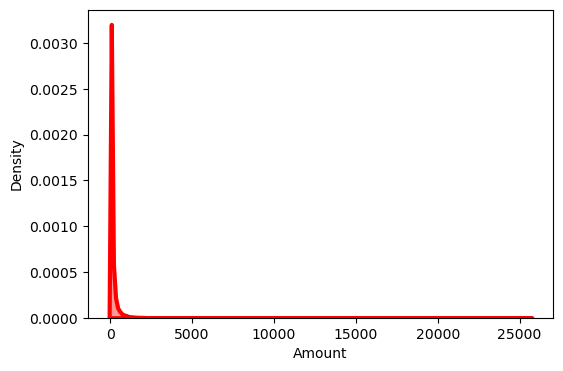

In [109]:
plt.figure(figsize=(6,4))
sns.kdeplot(df.Amount, fill=True, color='red', alpha=0.4, linewidth=3)
#sns.distplot(df.Amount,color = 'r')

#### Standard Scaler / 표준화

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.copy = df.iloc[:,1:-2]
df.copy['Amount_Scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.copy.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [110]:
# df.copy를 x1 데이터로 재정의
x1 = df.copy

- 표준화 시킨 데이터로 다시 train/test set 나누기

In [112]:
x1_tr, x1_t, y_tr, y_t = train_test_split(x1, y, 
                                          stratify=y,
                                          test_size=0.3, 
                                          random_state=0xC0FFEE)


- 모델 평가

In [113]:
%%time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'Decision Tree', 'Random Forest', 'LGBM']

results = get_result_pd(models,model_names, x1_tr, y_tr, x1_t,y_t)

print(results)

               accuracy  precision    recall        f1   roc_auc
LogisticReg    0.999192   0.869159  0.628378  0.729412  0.814107
Decision Tree  0.999333   0.813793  0.797297  0.805461  0.898490
Random Forest  0.999590   0.944882  0.810811  0.872727  0.905364
LGBM           0.999661   0.947368  0.851351  0.896797  0.925635
CPU times: total: 7min 33s
Wall time: 42.3 s


> ver1 

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>accuracy</th>
      <th>precision</th>
      <th>recall</th>
      <th>f1</th>
      <th>roc_auc</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>LogisticReg</th>
      <td>0.999192</td>
      <td>0.869159</td>
      <td>0.628378</td>
      <td>0.729412</td>
      <td>0.814107</td>
    </tr>
    <tr>
      <th>Decision Tree</th>
      <td>0.999333</td>
      <td>0.813793</td>
      <td>0.797297</td>
      <td>0.805461</td>
      <td>0.898490</td>
    </tr>
    <tr>
      <th>Random Forest</th>
      <td>0.999590</td>
      <td>0.944882</td>
      <td>0.810811</td>
      <td>0.872727</td>
      <td>0.905364</td>
    </tr>
    <tr>
      <th>LGBM</th>
      <td>0.999146</td>
      <td>0.769784</td>
      <td>0.722973</td>
      <td>0.745645</td>
      <td>0.861299</td>
    </tr>
  </tbody>
</table>
</div>

---
> ver2
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>accuracy</th>
      <th>precision</th>
      <th>recall</th>
      <th>f1</th>
      <th>roc_auc</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>LogisticReg</th>
      <td>0.999192</td>
      <td>0.869159</td>
      <td>0.628378</td>
      <td>0.729412</td>
      <td>0.814107</td>
    </tr>
    <tr>
      <th>Decision Tree</th>
      <td>0.999333</td>
      <td>0.813793</td>
      <td>0.797297</td>
      <td>0.805461</td>
      <td>0.898490</td>
    </tr>
    <tr>
      <th>Random Forest</th>
      <td>0.999590</td>
      <td>0.944882</td>
      <td>0.810811</td>
      <td>0.872727</td>
      <td>0.905364</td>
    </tr>
    <tr>
      <th>LGBM</th>
      <td>0.999661</td>
      <td>0.947368</td>
      <td>0.851351</td>
      <td>0.896797</td>
      <td>0.925635</td>
    </tr>
  </tbody>
</table>
</div>

- LGBM의 경우 recall 값이 조금 향상되었다./ precicion의 값도 높아짐.
- 큰 변화는 딱히 없음

> 모델별 ROC커브 시각화

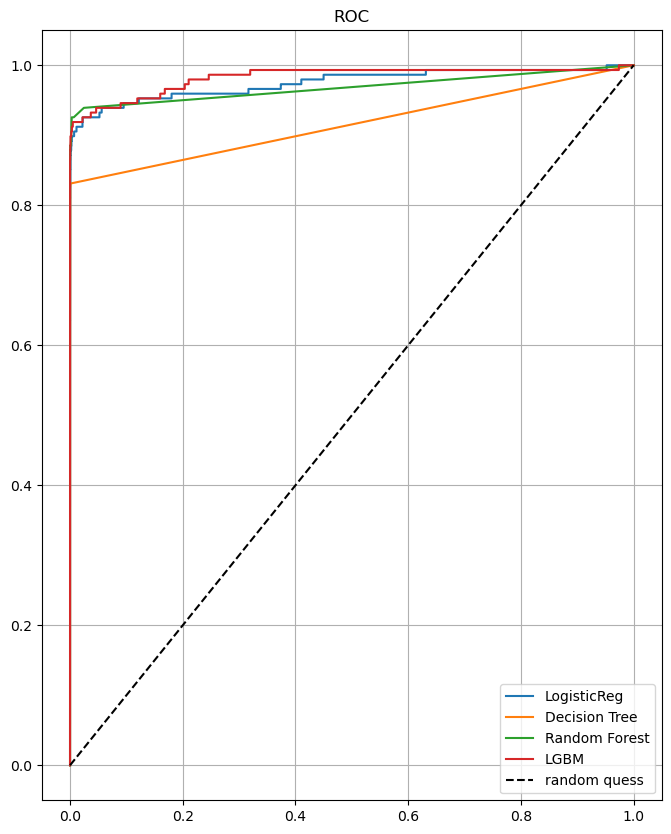

In [121]:
from sklearn.metrics import roc_curve

def draw_curve(models, model_names, x_t,y_t):
    plt.figure(figsize = (8,10))

    for model in range(len(models)):
        pred =models[model].predict_proba(x_t)[:,1]
        fpr, tpr, threshold = roc_curve(y_t,pred)
        plt.plot(fpr, tpr, label = model_names[model])

    plt.plot([0,1],[0,1], 'k--', label = 'random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show();

draw_curve(models, model_names, x1_t, y_t)

#### Log scale / 표준화

In [124]:
x2 = df.iloc[:,1:-2].copy()
x2['Amount_scaled'] = np.log1p(df['Amount'])
x2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


<Axes: xlabel='Amount_scaled', ylabel='Density'>

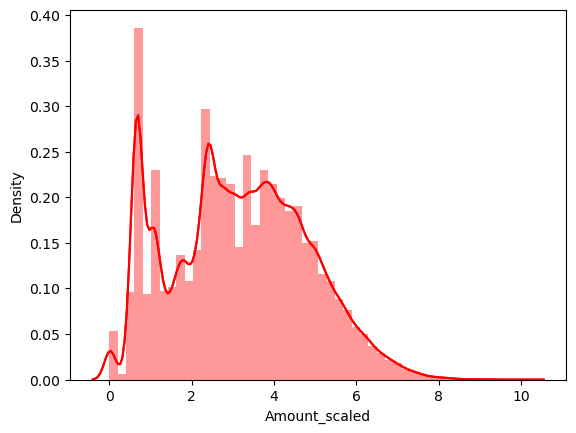

In [130]:
sns.kdeplot(x2['Amount_scaled'], color = 'r')
sns.distplot(x2['Amount_scaled'],color = 'r')

- 바뀐 데이터셋 x2 로 다시 train/test 분리

In [132]:
x2_tr, x2_t, y_tr, y_t = train_test_split(x2, y, 
                                          stratify=y,
                                          test_size=0.3, 
                                          random_state=0xC0FFEE)

- 성능 평가 
> 로그 스케일 후에도 큰 차이를 보이진 않는다.

In [134]:
%%time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'Decision Tree', 'Random Forest', 'LGBM']

results = get_result_pd(models,model_names, x2_tr, y_tr, x2_t,y_t)

results

CPU times: total: 7min 30s
Wall time: 42.4 s


,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.999239,0.895238,0.635135,0.743083,0.817503
Decision Tree,0.999333,0.813793,0.797297,0.805461,0.898490
Random Forest,0.999590,0.944882,0.810811,0.872727,0.905364
LGBM,0.999672,0.947761,0.858108,0.900709,0.929013


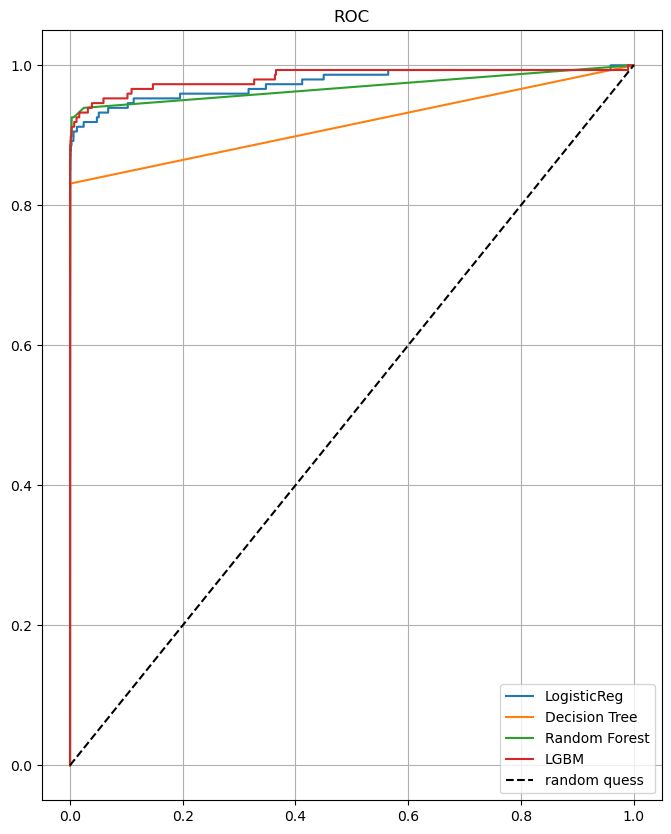

In [137]:
draw_curve(models, model_names, x2_t, y_t)

## 3.모델 적용 및 성능 평가 ver3
**❌Outlier 정리 후 비교해보기**

In [197]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: >

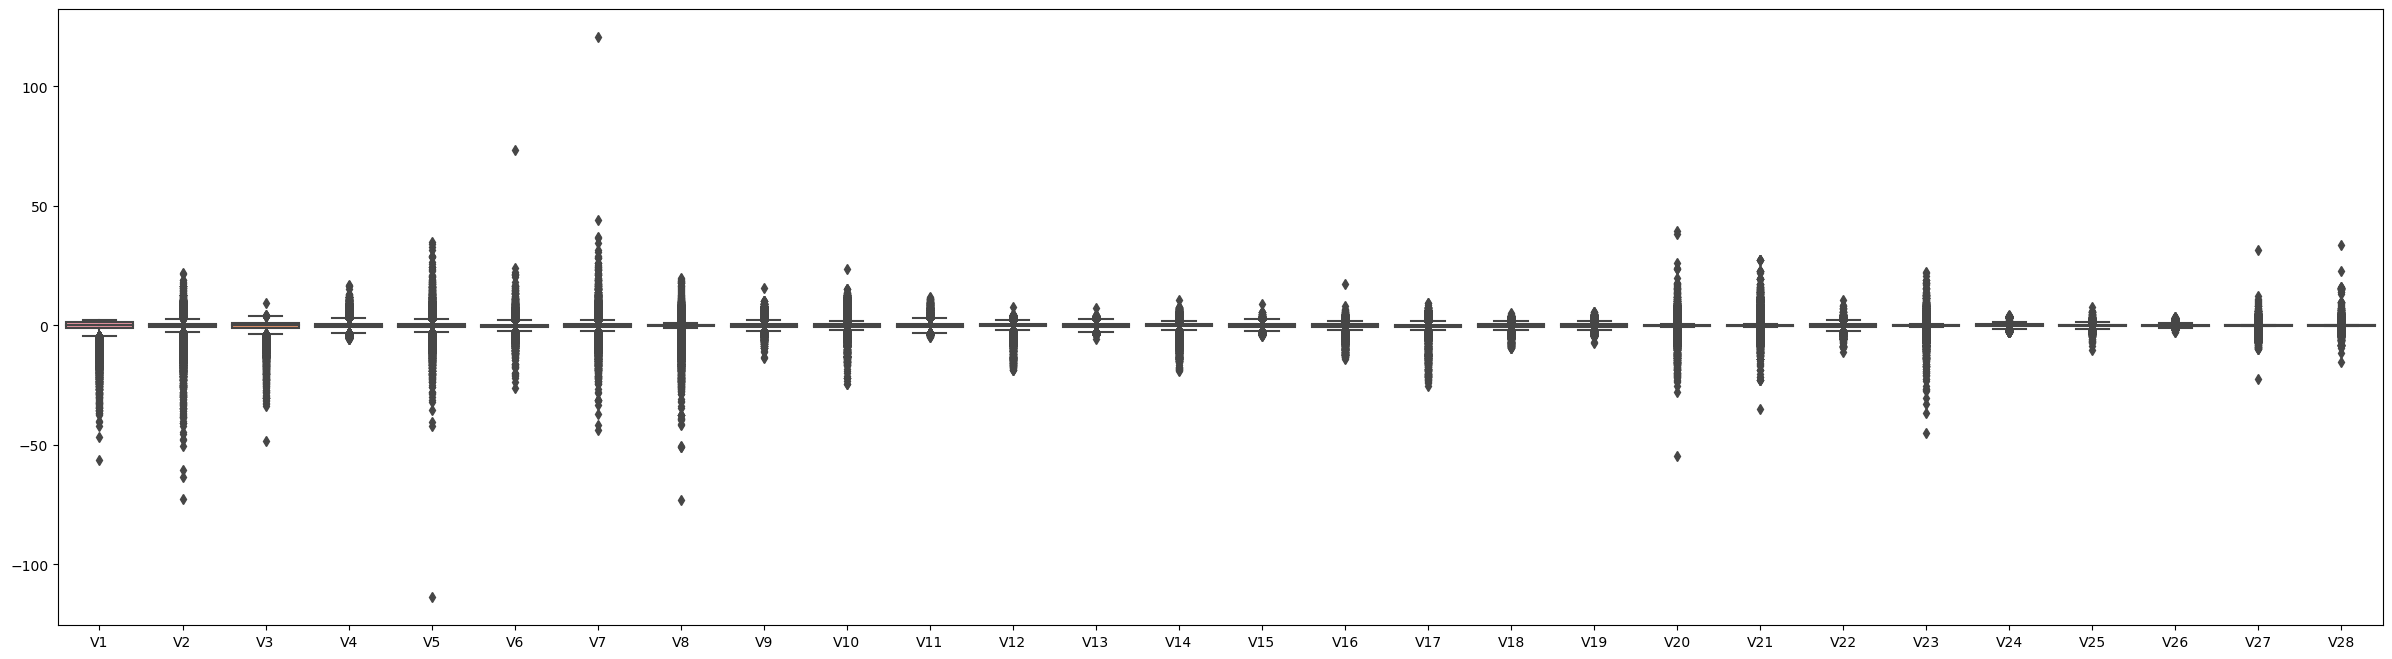

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(30,8))
sns.boxplot(df.iloc[:,1:-2])

- outlier 찾는 함수 만들기

In [152]:
def get_outlier(df = None, column = None, weight = 1.5):
    fraud = [df['Class'] == 1][column]
    q1 = np.percentile(fraud.values,25)
    q3 = np.percentile(fraud.values,75)

    iqr = q3 - q1
    iqr_weight = iqr * weight
    lowest = q1 - iqr_weight
    highest = q3 + iqr_weight

    outlier_index = fraud[(fraud < lowest) | (fraud > highest)].index

    return outlier_index

- outlier가 가장 많이 발생한 컬럼 top3 개 정도 정리해보기

In [168]:
column_of_outlier = {}

for col in df.columns:
    column_of_outlier[col] = len(get_outlier(df = df, column = col))

sorted(column_of_outlier.items(),key = lambda x: x[1],reverse= True)

[('V8', 98),
 ('V27', 70),
 ('Amount', 69),
 ('V23', 59),
 ('V3', 53),
 ('V1', 52),
 ('V21', 49),
 ('V2', 46),
 ('V28', 46),
 ('V5', 45),
 ('V20', 41),
 ('V25', 36),
 ('V7', 30),
 ('V22', 24),
 ('V10', 19),
 ('V9', 17),
 ('V6', 15),
 ('V11', 10),
 ('V15', 8),
 ('V12', 6),
 ('V19', 5),
 ('V14', 4),
 ('V24', 3),
 ('V26', 2),
 ('Time', 0),
 ('V4', 0),
 ('V13', 0),
 ('V16', 0),
 ('V17', 0),
 ('V18', 0),
 ('Class', 0)]

**이상치가 있는 컬럼을 확인했으니 log scale했던 데이터 x2의 컬럼을 정리**

In [213]:
x2_copy = x2.copy()
df_copy = df

x2_copy.shape,df.shape

((284807, 29), (284807, 31))

- v8 컬럼 이상치 삭제

In [214]:
outlier_index = get_outlier(df = df, column = 'V8',weight=1.5)
x2_copy.drop(outlier_index, axis = 0, inplace= True)
df_copy.drop(outlier_index, axis = 0, inplace= True)
x2_copy.shape, df_copy.shape

((284709, 29), (284709, 31))

- v25 컬럼 이상치 삭제(앞의 컬럼과 겹치는게 있을 수 있으므로 error 옵션 추가)

In [215]:
outlier_index = get_outlier(df = df, column = 'V27',weight=1.5)
x2_copy.drop(outlier_index, axis = 0, inplace= True)
df_copy.drop(outlier_index, axis = 0, inplace= True)
x2_copy.shape, df_copy.shape

((284657, 29), (284657, 31))

- v23 컬럼 삭제

In [216]:
outlier_index = get_outlier(df = df, column = 'V23',weight=1.5)
x2_copy.drop(outlier_index, axis = 0, inplace= True)
df_copy.drop(outlier_index, axis = 0, inplace= True)
x2_copy.shape, df_copy.shape

((284619, 29), (284619, 31))

- outlier 제거 후 데이터 나누기

In [217]:
X = x2_copy

y = df.iloc[:,-1]
X_tr, X_t, y_tr, y_t = train_test_split(X, y, 
                                          stratify=y,
                                          test_size=0.3, 
                                          random_state=0xC0FFEE)


- 모델 적용
-> 오히려 감소..

In [219]:
%%time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'Decision Tree', 'Random Forest', 'LGBM']

results = get_result_pd(models,model_names, X_tr, y_tr, X_t,y_t)

print(results)

               accuracy  precision    recall        f1   roc_auc
LogisticReg    0.999508   0.901639  0.604396  0.723684  0.802163
Decision Tree  0.999532   0.814815  0.725275  0.767442  0.862549
Random Forest  0.999660   0.942857  0.725275  0.819876  0.862614
LGBM           0.999614   0.902778  0.714286  0.797546  0.857102
CPU times: total: 5min 53s
Wall time: 36.2 s


## 3. 모델 적용 및 성능평가 ver4
**🎈data 불균형을 맞추기 위해 oversampling 시도해보기**
- SMOTE 적용

In [220]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.3 kB 960.0 kB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 3.9 MB/s eta 0:00:00


In [223]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0xC0FFEE)
x_tr_ov, y_tr_ov = smote.fit_resample(X_tr,y_tr)

  File "c:\Users\bigdata\anaconda3\envs\ds_study\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [224]:
X_tr.shape, y_tr.shape

((199233, 29), (199233,))

In [225]:
x_tr_ov.shape, y_tr_ov.shape

((398040, 29), (398040,))

- 데이터셋의 불균형이 완화된 것을 확인할 수 있음.

In [226]:
print(np.unique(y_tr, return_counts=True))
print(np.unique(y_tr_ov, return_counts=True))

(array([0, 1], dtype=int64), array([199020,    213], dtype=int64))
(array([0, 1], dtype=int64), array([199020, 199020], dtype=int64))


In [230]:
X_t.shape, y_t.shape

((85386, 29), (85386,))

In [231]:
%%time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'Decision Tree', 'Random Forest', 'LGBM']

results = get_result_pd(models,model_names, x_tr_ov, y_tr_ov, X_t,y_t)
results

CPU times: total: 13min 38s
Wall time: 1min 19s


,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.960930,0.022934,0.857143,0.044674,0.909092
Decision Tree,0.964819,0.023864,0.802198,0.046349,0.883595
Random Forest,0.999567,0.855263,0.714286,0.778443,0.857078
LGBM,0.999602,0.835294,0.780220,0.806818,0.890028


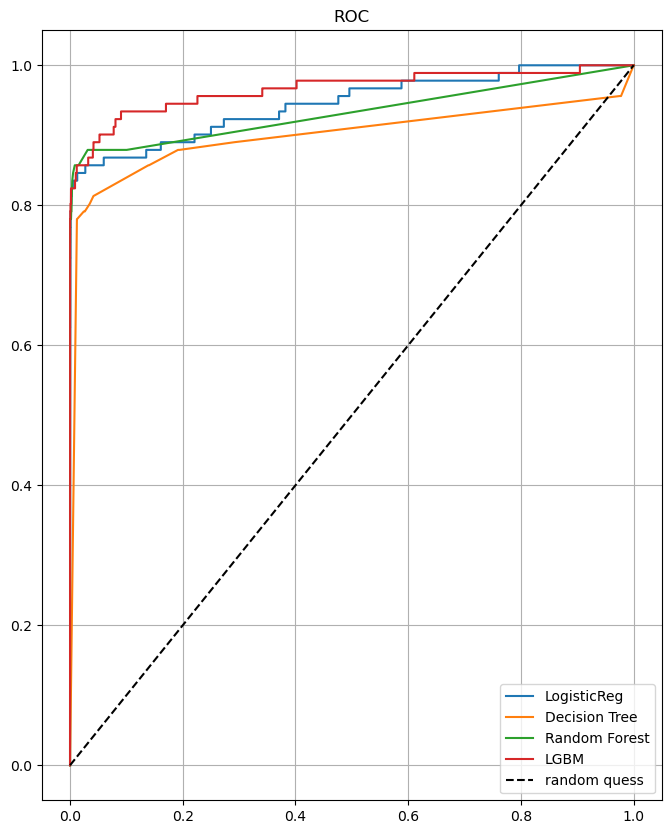

In [233]:
draw_curve(models, model_names, X_t, y_t)

---
✏️ ### 회고
- 아웃라이어 처리시 많은 행들을 삭제해서 그런지 오히려 성능이 나빠졌다. 다음에는 v13-15라인 한번 검증해보자
- 각 컬럼별 상관성 파악해보기
